Utilização do 'Facebook Prophet' para a previsão .
https://facebook.github.io/prophet/docs/quick_start.html

In [4]:
# Importa bibliotecas; inicializa variáveis; define funções.
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib as mpl 
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math as mt

df = pd.read_csv('dadosRonaldo.csv')

df_prophet = df.loc[0:59,['data', 'total']]
df_prophet.rename(columns={'data': 'ds', 'total': 'y'}, inplace = True)
df_prophet.head()

,ds,y
0,2014-01-01,13427897
1,2014-02-01,14152120
2,2014-03-01,13710770
3,2014-04-01,12602895
4,2014-05-01,14603442


Cria e ajusta o modelo Prophet.

In [5]:
m = Prophet()

m.fit(df_prophet)

future = m.make_future_dataframe(periods=12, freq='MS')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
67,2019-08-01,2.373164e+07,2.177804e+07,2.556069e+07
68,2019-09-01,2.471337e+07,2.284393e+07,2.652145e+07
69,2019-10-01,2.432387e+07,2.254411e+07,2.606311e+07
70,2019-11-01,2.568375e+07,2.390622e+07,2.734109e+07
71,2019-12-01,2.418470e+07,2.243714e+07,2.599238e+07


Resultado da previsão da série (yhat).

In [12]:
resultado = forecast.loc[60:71, ['ds','yhat']]
resultado = resultado.rename(columns={'ds': 'data'})
from datetime import date
resultado['data'] = resultado['data'].dt.strftime('%Y-%m-%d') # Ajusta a coluna da data.
resultado

,data,yhat
60,2019-01-01,2.034713e+07
61,2019-02-01,2.030886e+07
62,2019-03-01,2.358965e+07
63,2019-04-01,2.019957e+07
64,2019-05-01,2.072847e+07
65,2019-06-01,2.209273e+07
66,2019-07-01,2.303409e+07
67,2019-08-01,2.373164e+07
68,2019-09-01,2.471337e+07
69,2019-10-01,2.432387e+07


Valores reais da série ('total').

In [13]:
real = df.loc[60:71,['data', 'total']]
real

,data,total
60,2019-01-01,20039718
61,2019-02-01,19745890
62,2019-03-01,20240937
63,2019-04-01,19011266
64,2019-05-01,21433199
65,2019-06-01,21390771
66,2019-07-01,22132554
67,2019-08-01,24835788
68,2019-09-01,25580157
69,2019-10-01,26673778


Apresentação dos dados e rmse.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


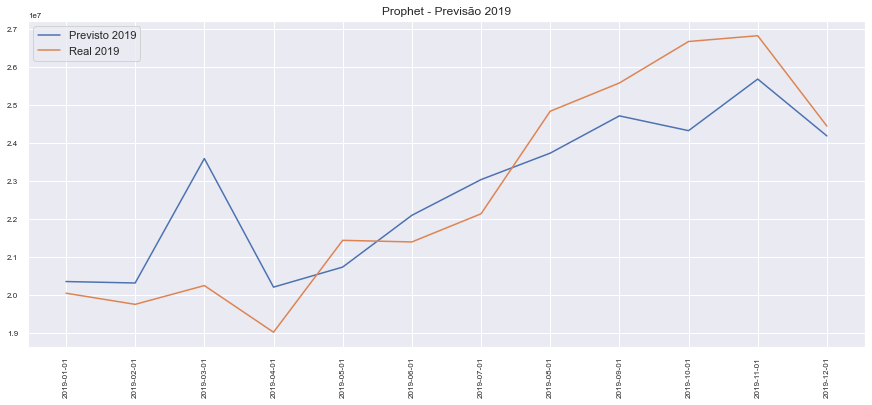

O valor do rmse é:  1405480.3746916216


In [14]:
final_2019 = pd.merge(resultado, real, how = 'inner')
x = final_2019['data']
y1 = final_2019['yhat']
y2 =final_2019['total']

sns.set()
plt.figure(figsize=(15,6))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.title('Prophet - Previsão 2019')
plt.xticks(rotation=90)
plt.plot(x,y1,label="Previsto 2019")
plt.plot(x,y2,label="Real 2019")
plt.legend()
plt.show()

#Calcula o rmse de cada variável.
print('O valor do rmse é: ', mt.sqrt(mean_squared_error(final_2019['yhat'], final_2019['total'])))